In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister



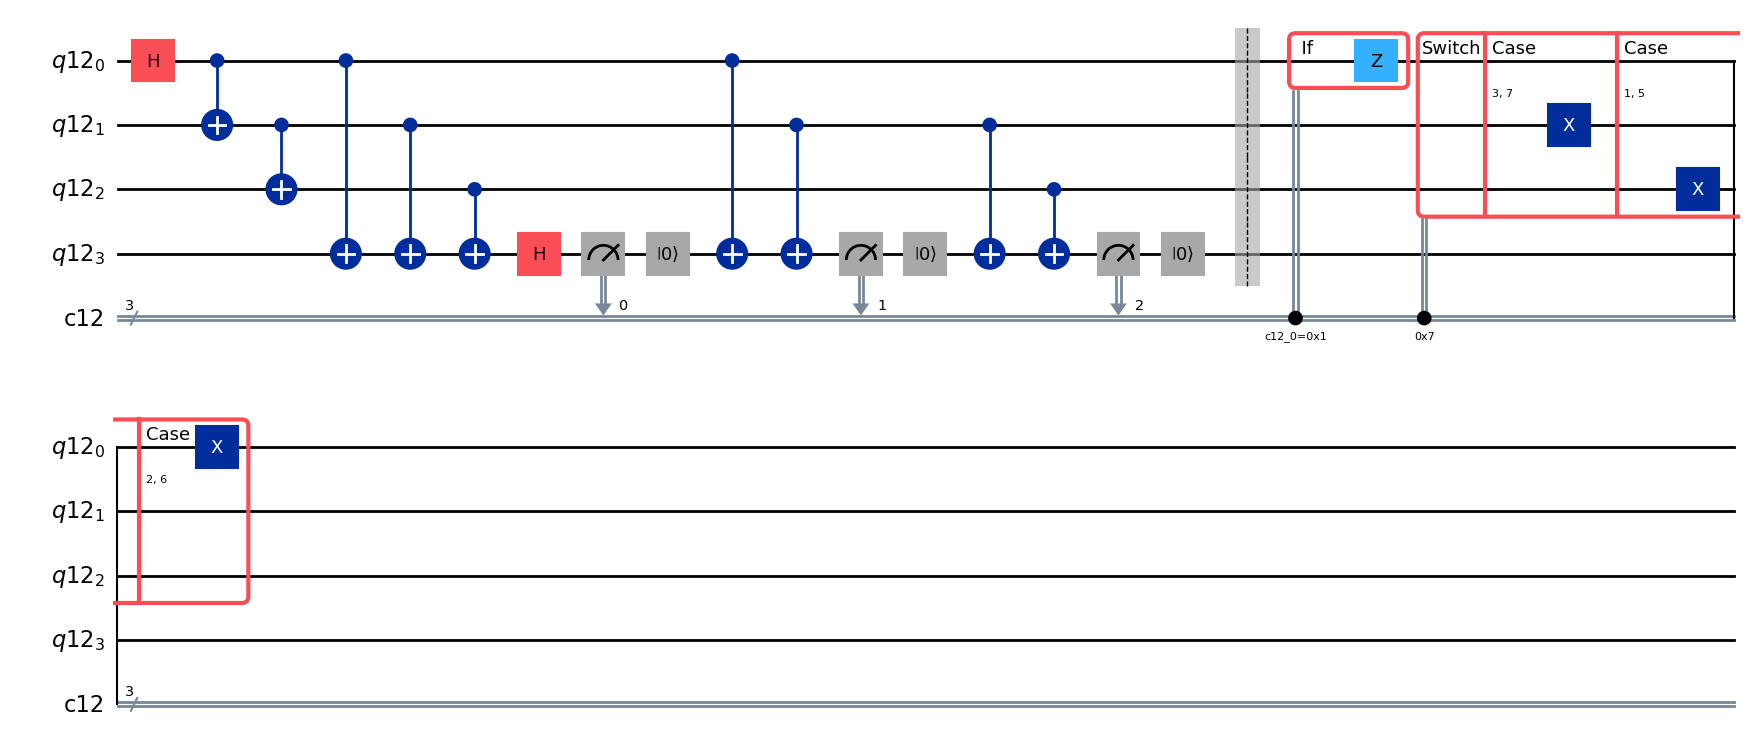

In [20]:
def make_m_rounds_ghz(m):
    for _ in range(m):
        qubits = QuantumRegister(4)
        clbits = ClassicalRegister(3)
        qc = QuantumCircuit(qubits, clbits)
        (q0,q1,q2, q3) = qubits
        (c0,c1,c2) = clbits
        qc.h(q0)
        qc.cx([q0,q1],[q1,q2])
        # S1
        qc.cx([q0,q1,q2],q3)
        qc.h(q3)
        qc.measure(q3,c0)
        qc.reset(q3)
        # S2
        qc.cx([q0,q1],q3)
        qc.measure(q3,c1)
        qc.reset(q3)
        # S3
        qc.cx([q1,q2],q3)
        qc.measure(q3,c2)
        qc.reset(q3)
        qc.barrier()
        with qc.if_test((c0,1)):
            qc.z(q0)
        
        with qc.switch(clbits) as case:
            with case(0b011,0b111):
                qc.x(q1)
            with case(0b001,0b101):
                qc.x(q2)
            with case(0b010,0b110):
                qc.x(q0)    
        
    return qc

qc = make_m_rounds_ghz(2)
qc.draw('mpl')


Theory answer: corrections for the X errors can be applied and any Z correction is equivalent, so it doesnt matter if we correct Z2 as Z1.

# b)

In [21]:
from qiskit_ibm_provider import IBMProvider

file_token = open("ibm_login_token_clemens.txt")
token = file_token.read()
file_token.close()

IBMProvider.save_account(overwrite=True, token=token)
provider = IBMProvider()


name = 'ibm_kyoto'
backend = provider.get_backend(name)

/tmp/ipykernel_740919/1992769483.py:1: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


In [23]:
from qiskit import transpile
qcg = make_m_rounds_ghz(2)
qcgt = transpile(qcg, backend=backend, initial_layout=[19,21,33,20])


In [24]:
job = backend.run(qcgt, shots = 500)
job.job_id()

'csqe258p1vzg008aj3ng'